# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 0303 Парамонов Вячеслав, вариант 14.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных
аддитивных цепочек для заданного числа, привить навык использования
систем компьютерной математики для реализации алгоритмов.


## Основные теоретические положения

### 1) Задача вычисления степени за минимальное число операций:

Дано число x и необходимо за наимененьшее возможное число операций вычислить $x^n$.

### 2) Некоторые алгоритмы нахождения степени n числа x:

#### 1. Бинарный метод возведения в степень "SX":

а) Записать n в бинарном виде: 
$$ n = (a_{m}a_{m-1}...a_2a_1)_2, \text{ } a_m = 1 $$
б) Отбрасываем старший бит, получаем:
$$ (a_{m-1}...a_2a_1)_2 $$
в) Совершаем замену по следующему правилу:

$ 
  a_i = 1 \text{ |=> } a_i = \text{"SX"} \\ 
  a_i = 0 \text{ |=> } a_i = \text{"S"}
$

Получаем строку операций, где "S" - введение в квадрат (умножение на себя), "X" - умножение на x.

#### 2. Бинарный метод возведения в степень справа налево:

Является версией бинарного метода "SX" удобной для компьютера:
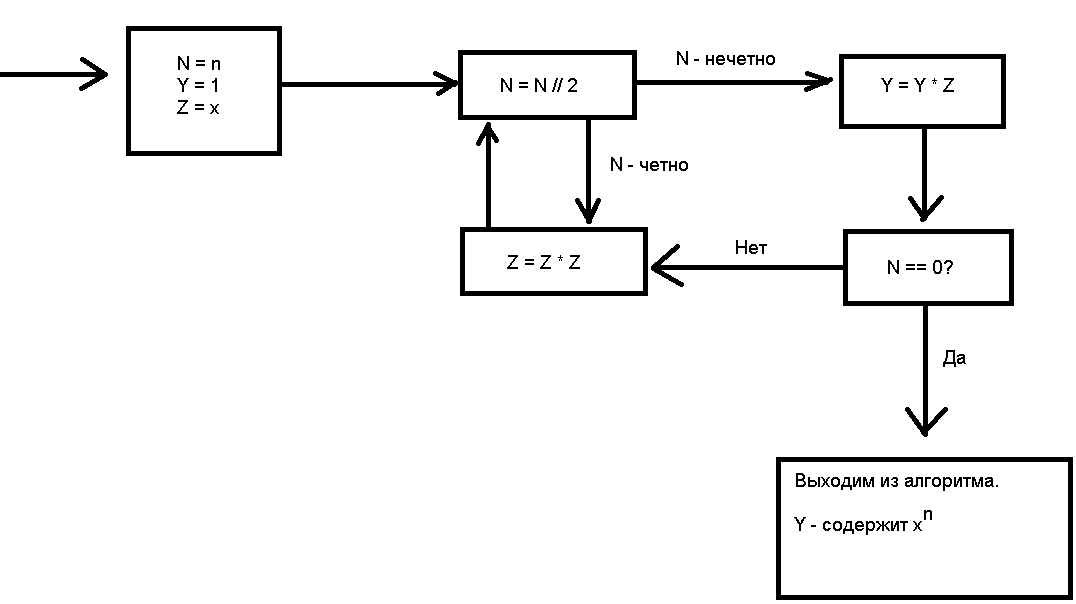

*) Введем некоторые обозначения:
- $I(n)$ - количество операций для возведения в n-ую степень.
- $\lambda(n) = ⌊lb (n)⌋ $ - уменьшенная на единицу длина бинарной записи числа n.
- $\nu(n)$ - вес Хемминга для бинарной записи числа n (количество единиц в бинарной записи n).

То число операций для бинарного метода:
$$ I(n) = \lambda(n) + \nu(n) - 1 $$

*Бинарный метод не дает минимальное число операций (пример, n = 15).*

#### 3. Метод множителей:

а) Если n - не простое, то представляем $ n = pq $, где p - наименьший простой множитель n. q > 1. Таким образом $ x^n $ можно найти, вычислив $ x^p $ и возведя эту величину в q.

б) Если n - простое, то можно сначала вычислить $ x^{n-1} $ и умножить на x.

в) При n = 1 получаем $ x^n $.

Рекурсивно применяя эти шаги, можно получить $x^n$.

*Метод множителей не дает минимальное число операций (пример, n = 33).*

#### 4. m-арный метод:

а) Представляем n в системе счисления m:
$$ n = \sum_{j=0}^{t} {d_j m^{t-j}} \text{, где } 0 \le d_j < m $$
б) Выполняем постороение $ x, x^2, x^3, ..., x^{m-1} $

в) Возводим $ x^{d_0} $ в степень m и умножаем на $ x^{d_1} $. Таким образом, получаем $ y_1 = x^{d_0 m + d_1} $

г) Возводим $ y_1 $ в степень m и умножаем на $ x^{d_2} $.  Таким образом, получаем $ y_2 = x^{d_0 m^2 + d_1 m + d_2} $

д) Аналогично продолжаем, пока не получим $ y_t = x^n $.

*Бинарный метод является частным случаем m-арного метода.*

#### Дерево степеней:

а) Пусть построен k-ый уровень дерева. Необходимо построить (k+1)-ый уровень.

б) Берем каждый узел n на k-ом уровне слева направо и присоединяем к нему снизу узлы:
$$ n + a_0, n + a_1, n + a_2, ..., n + a_{k-1}, 2n $$

** Если какой-то узел был добавлен раньше в дерево, то его не добавляем.

в) Здесь порядок присоединения важен. Порядок возведения x в степень n представляет собой путь от корня дерева к узлу n.

*Дерево степеней дает минимальное количество умножений для относительно малых n.*

Первые 7 уровней дерева (индексация с 0):

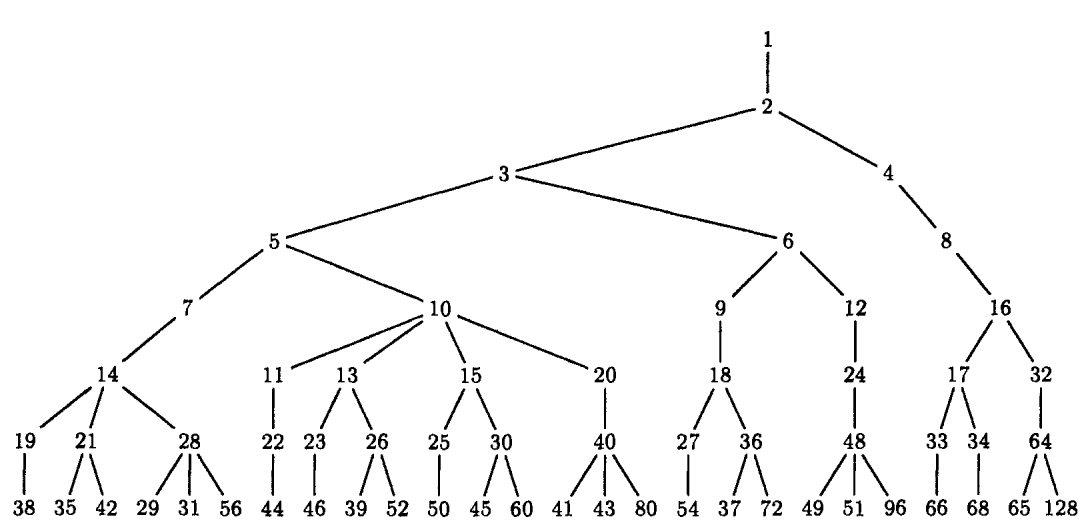

### 3) Понятие аддитивной цепочки:

Аддитивной цепочкой для натурального числа n называется последовательность натуральных чисел:
$$ 1 = a_0, a_1, a_2, ..., a_r = n,$$
где каждый элемент последовательности равен сумме двух предыдущих:
$$ a_i = a_j + a_k, \text{ } k \le j < i, \text{ } i = 1, 2, ..., r $$

### 4) Связь аддитивных цепочек с ранее рассмотренными методами возведения в степень:

- Пусть $l(n) = r$  - длина наименьшей аддитивной цепочки для получения n.
- Неравенство для бинарного метода:
$$ l(n) \le \lambda(n) + \nu(n) - 1 $$
- Неравенство для метода множителей:
$$ l(mn) \le l(m) + l(n) $$
- Неравенство для m-арного метода (если $ m = 2^k $, $ n = \sum_{j=0}^{t} {d_j m^{t - j}} $):
$$ l(n) \le m - 2 + (k+1)t $$

### 5) Свойства аддитивных цепочек:
- Полагаем, что все аддитивные цепочки возрастающие.
- Если 2 числа $ a_i $ одинаковые, то 2 из них может быть опущено.
- Пара (j, k), $ 0 \le k \le j < i $ называется шагом i.
- Если существует более 1 подходящая пара (j, k), то полагаем, что j - наибольшее из возможных.

### 6) Виды шагов:
а) Удвоение: $ j = k = i - 1 $

б) Звездный шаг: $ j = i - 1 $

в) Малый шаг: $ \lambda(a_i) = \lambda(a_{i-1}) $

### 7) Свойства аддитивных цепочек:

- Теорема. Если аддитивная цепочка включает d удвоений и f = r - d неудвоений, то:
$$ n \le 2^{d - 1} F_{f + 3}, $$
где $ F_j $ - число фибоначчи.
- Следствие. Если аддитивная цепочка включает f неудвоений и s малых шагов, то:
$$ s \le f \le \frac{s}{1 - lb(\varphi)}, $$
где $ \varphi = \frac{\sqrt{5} + 1}{2} $ - золотое сечение.

### 8) Приближенные алгоритмы нахождения аддитивных цепочек:

#### 1. Алгоритм Брауэра:
 
Позволяе вычислить n-ую степень за:
$$ l_B(n) = \lambda(n) + \frac{\lambda(n)}{\lambda(\lambda(n))} + O\left( \frac{\lambda(n)\lambda(\lambda(\lambda(n)))}{(\lambda(\lambda(n)))^2} \right) $$

**Сам алгоритм:**

а) Задается некий целый фиксированный параметр $ k \ge 2 $ для рассматриваемого числа n.

б) Выполняется вычисление вспомогательных чисел:
- $ d = 2^k $
- $ q_1, r_1 $ таких, что $ n = q_1 d + r_1 $ ($ 0 \le r_1 < d $)
- $ q_2, r_2 $ таких, что $ q_1 = q_2 d + r_2 $ ($ 0 \le r_2 < d $)
- ...
- До $ q_s < d $, соответственно $ q_{s-1} = q_s d + r_s $ ($ 0 \le r_s < d $)

в) Таким образом n имеет вид:
$$ n = 2^k q_1 + r_1 = 2^k(2^k q_2 + r_2) + r_1 = ... = 2^k(2^k(...(2^k q_s + r_s)...)) $$

г) В этой записи уже содержится искомая цепочка, дотсаточно составить базовую цепочку:
$$ 1, 2, 3, ..., 2^k - 1 $$

Следующие элементы цепочки: $ 2q_s, 2^2q_s, ..., 2^k q_s, 2^k q_s + r_s = q_{s-1} $

Затем: $ 2q_{s-1}, 2^2q_{s-1}, ..., 2^k q_{s-1}, 2^k q_{s-1} + r_{s-1} = q_{s-2} $

...

В итоге: $ 2q_1, 2^2q_1, ..., 2^k q_1, 2^k q_1 + r_1 = n $

*Длина цепочки будет минимизированна для больших n, если положить $ k = \lambda(\lambda(n)) - 2\lambda(\lambda(\lambda(n))) $*

#### 2. Алгоритм Яо:

Вычислительная сложность такая же, как у алгоритма Брауэра.

**Сам алгоритм:**

а) Задается некий целый фиксированный параметр $ k \ge 2 $ для рассматриваемого числа n.

б) n раскладывается в системе счисления по основанию $ 2^k $:
$$ n = \sum_{i=0}^{j} {a_i 2^{ik}}, \text{ } a_j \ne 0 $$

в) Задается базовая последовательность $ 1, 2, 4, 8, ..., 2^{\lambda(n)} $

г) Вычисляем значения функции d(z):
$$ d(z) = \sum_{i: a_i = z} {2^{ik}} $$

Для $ z \in \{ 1, 2, 3, ..., 2^k - 1 \} $, причем $d(z) \ne 0$.

д) Вычисляем $zd(z)$ для всех z.

е) Тогда n представляет собой разложение вида:
$$ n = \sum_{z=1}^{2^k - 1} {zd(z)} $$

А аддитивная цепочка для получения n будет выглядеть, как комбинация базовой цепочки и цепочек для получения $zd(z)$.

### 9) Оптимизации оценок длин аддитивных цепочек:
#### 1. Для $ \nu(n) $  - любого:
- $ l(n) \ge ⌈lb(n)⌉ $
- $ l(n) \ge \lambda(n) + \lambda(\nu(n)) - O(log(log(\nu(n)))) $

#### 2. Для  $ \nu(n) \le 2 $:
- $ l(2^A) = A $
- $ l(2^A + 2^B) = A + 1 \text{, если } A > B $ 

#### 3. Для  $ \nu(n) = 3 $:
- Теорема. Если  $ \nu(n) = 3 $, то $ l(2^A + 2^B + 2^C) = A + 2 \text{, если } A > B > C. $

#### 4. Для  $ \nu(n) \ge 4 $:
- Теорема. Если  $ \nu(n) \ge 4 $, то $ l(n) \ge  \lambda(n) + 3 $, за исключением случаев, когда A > B > C > D, $ l(2^A + 2^B + 2^C + 2^D) = A + 2 $ и одно из следующих условий выполнено:

а) $ A - B = C - D $

б) $ A - B = C - D + 1 $

в) $ A - B = 3, C - D = 1 $

г) $ A - B = 5, B - C = C - D = 1 $

#### 5. Для $ \lambda(n) > 8 $:
- $ l(n) \ge \lambda(n) + 4 $

### 10) Звездные цепочки:
- Звездной цепочкой называется аддитивная цепочка, включающая в себя только звездные шаги.
- Длина звездной цепочки: $ l^{*}(n) $.
- Шаг звездной цепочки: $ a_i = a_{i-1} + a_k $ для любого k < i.
- $ l(n) \le l^{*}(n)$.
- Пусть дана звездная цепочка длины m-1 вида $ 1 = a_1, a_2, ..., a_m $. Для каждой звезной цепочки существует вектор индексов:
$$ r = \{ r_1, r_2, ..., r_m \}, $$
длины m - 1, такой, что $ r_i = z: 1 \le z \le i $, $ a_i = a_{i-1} + a_{r_{i-1}} $, $ 2 \le i \le m - 1 $.
- $ r_1 $ всегда = 1. $ r_2 = \{ 1, 2 \} $ и так далее.
- Наибольшая по значению последнего элемента звездная цепочка будет иметь вид $ a = \{ 1, 2, 4, ..., 2^{m-1} \} $, а её вектор индексов $ r = \{ 1, 2, 3, ..., m-1 \} $.
- Наименьшая по значению последнего элемента звездная цепочка будет иметь вид $ a = \{ 1, 2, 3, ..., m-1 \} $, а её вектор индексов $ r = \{ 1, 1, 1, ..., 1 \} $.
- Мощность множества звездных цепочек длины m-1: #$ A^{*}(m-1) = (m-1)! $.

### 11) Сравнимость векторов индексов:
Даны 2 вектора индексов равной длины $ r = \{r_1, r_2, ..., r_m\} $ и $ \tilde{r} = \{ \tilde{r_1}, \tilde{r_2}, ..., \tilde{r_m} \} $. Тогда $ r > \tilde{r} $, если $ r_1 = \tilde{r_1} = 1, r_2 = \tilde{r_2}, ..., r_{i-1} = \tilde{r_{i-1}} $, причем $ r_i > \tilde{r_i} $.

### 12) Алгоритм дробления вектора индексов:
- Дано натуральное число n. Необходимо найти минимальную звездную цепочку, такую, что $ a_m = n $.
- Рассмотрим вектор индексов вида:
$$ \{ r_1, r_2, ..., r_q \} \cup \{ p_{q+1}, p_{q+2}, ..., p_m \} $$

Назовем левую часть фиксированной, а правую - меняющейся, то "изменений" набора всего $ \frac{m!}{q!} $.  

**Сам алгоритм:**

а) Выбирается число $ q \in N $.

б) Внешний цикл по длинам цепочек $ \underline{l(n)} \le m \le \overline{l(n)} $.

в) Внутренний цикл перебора всех $ \{ r_1, r_2, ..., r_q \} $. На каждом шаге при фиксированной части вычисляем $ a_{min} $ и $ a_{max} $:

$ \qquad $1. Если $ a_m = n $, то задача решена.
    
$ \qquad $2. Если $ n \notin \{ a_{min}, a_{max} \} $, то переходим к следующему набору $ \{ r_1, r_2, ..., r_{q-1} \} $.

$ \qquad $3. Если $ n \in \{ a_{min}, a_{max} \} $, то организуем внутренний перебор меняющейся части $ \{ p_{q+1}, p_{q+2}, ..., p_m \} $:

$ \qquad $$ \qquad $I) Если обнаруживается $ a_m = n $, то задача решена.

$ \qquad $$ \qquad $II) Если в цикле таких векторов не оказалось, то переходим к следующей (по введенной упорядоченности) фиксированной части $ \{ r_1, r_2, ..., r_q \} $.

г) Если все наборы фиксированной длины исчерпаны, то увеличиваем общую длину цепочки во внешнем цикле.

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной математики SageMath, провести анализ алгоритмов. Полученные результаты
содержательно проинтерпретировать.

## Порядок выполнения работы

1. Вручную (т.е. не реализовывая алгоритм на Sage) построить последовательность вычислений бинарным методом и методом множителей для $𝑥^𝑛$ для 2-3 значений 𝑛 (значение $𝑛 \ge 30$ выбираются студентом самостоятельно). Сравнить количество операций для
каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) и алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании
1
параметра 𝑘, сопоставить длины полученных аддитивных цепочек
с минимальной аддитивной цепочкой для заданного числа. Сделать
выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм минимум для 5 значений 𝑛 > 1000. Указать,
сколько времени потребовалось на поиск цепочки и какая цепочка
получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить гипотезу Шольца–Брауэра для всех натуральных $1 \le 𝑛 \le 12$ на алгоритме дробления вектора индексов. Результаты
оформить в виде таблицы. Сделать выводы.

5*. Найти или предложить собственные модификации алгоритмов и
привести описание модификаций. Реализовать модифицированные
алгоритмы и сравнить их мощность.


## Выполнение работы
### 1. Ручное вычисление бинарным методом и методом множителей:

Рассмотрим n = а) 31, б) 125, в) 256, г) 33

**(I) Бинарный метод:**

*а.1)* Переводим в 2 СС: $ 31_{10} = 11111_{2} $.

a.2) Тогда получаем "SXSXSXSX".

a.3) Окончательно: $ x, x^2, x^3, x^6, x^7, x^{14}, x^{15}, x^{30}, x^{31} $, $ I(n) = 8 $.

*б.1)* Переводим в 2 СС: $ 125_{10} = 1111101_{2} $.

б.2) Тогда получаем "SXSXSXSXSSX".

б.3) Окончательно: $ x, x^2, x^3, x^6, x^7, x^{14}, x^{15}, x^{30}, x^{31}, x^{62}, x^{124}, x^{125} $, $ I(n) = 11 $.

*в.1)* Переводим в 2 СС: $ 256_{10} = 2^{8}_{10}= 100000000_{2} $.

в.2) Тогда получаем "SSSSSSSS".

в.3) Окончательно: $ x, x^2, x^4, x^8, x^{16}, x^{32}, x^{64}, x^{128}, x^{256} $, $ I(n) = 8 $.

*г.1)* Переводим в 2 СС: $ 33_{10} = 100001_{2} $.

г.2) Тогда получаем "SSSSSX".

г.3) Окончательно: $ x, x^2, x^4, x^8, x^{16}, x^{32}, x^{33} $, $ I(n) = 6 $.

**(II) Метод множителей:**

*а.1)* $ x^{31} = x^{30} \times x $.

a.2) $ x^{30} = (x^{15})^{2} $.

a.3) $ x^{15} = (x^{5})^{3} $; ($ y^3 = y^2 \times y $; $ y^2 = y \times y $).

a.4) $ x^{5} = x^{4} \times x $.

a.5) $ x^{4} = (x^{2})^{2} $.

a.6) $ x^{2} = x \times x $.

a.7) Получаем необходимые операции (идем снизу вверх): $ x, x^2, x^4, x^5, x^{10}, x^{15}, x^{30}, x^{31} $, $ I(n) = 7 $.

*б.1)* $ x^{125} = (x^{25})^{5} $; ($ y^5 = y^4 \times y $; $ y^4 = (y^2)^2 $; $ y^2 = y \times y $).

б.2) $ x^{25} = (x^{5})^{5} $; ($ y^5 = y^4 \times y $; $ y^4 = (y^2)^2 $; $ y^2 = y \times y $).

б.3) $ x^{5} = x^{4} \times x $.

б.4) $ x^{4} = (x^{2})^{2} $.

б.6) $ x^{2} = x \times x $.

б.6) Получаем необходимые операции (идем снизу вверх): $ x, x^2, x^4, x^5, x^{10}, x^{20}, x^{25}, x^{50}, x^{100}, x^{125} $, $ I(n) = 9 $.

*в.1)* $ x^{256} = (x^{128})^{2} $.

в.2) $ x^{128} = (x^{64})^{2} $.

в.3) $ x^{64} = (x^{32})^{2} $.

в.4) $ x^{32} = (x^{16})^{2} $.

в.5) $ x^{16} = (x^{8})^{2} $.

в.6) $ x^{8} = (x^{4})^{2} $.

в.7) $ x^{4} = (x^{2})^{2} $.

в.8) $ x^{2} = x \times x $.

в.9) Получаем необходимые операции (идем снизу вверх): $ x, x^2, x^4, x^8, x^{16}, x^{32}, x^{64}, x^{128}, x^{256} $, $ I(n) = 8 $.

*г.1)* $ x^{33} = (x^{11})^3 $; ($ y^3 = y^2 \times y $; $ y^2 = y \times y $).

г.2) $ x^{11} = x^{10} \times x $.

г.3) $ x^{10} = (x^{5})^{2} $.

г.4) $ x^{5} = x^{4} \times x $.

г.5) $ x^{4} = (x^{2})^{2} $.

г.6) $ x^{2} = x \times x $.

г.7) Получаем необходимые операции (идем снизу вверх): $ x, x^2, x^4, x^5, x^{10}, x^{11}, x^{22}, x^{33} $, $ I(n) = 7 $.

**Промежуточный вывод:**

Получаем, что для n = 31 и n = 125 метод множителей лучше бинарного, для n = 256 методы дают одинаковое число операций и в одном случае (n = 33) метод множителей проигрывает бинарному методу. Тогда метод множителей почти всегда дает результат не хуже, чем бинарный метод, но существуют случаи, когда он оказывается менее эффективным.

### 2. Так как вариант четный, то реализуем алгоритм Яо:

Сначала реализуем функцию перевода в другую СС:

In [2]:
def new_base_num_system(num, new_base):
    new_base_num = []
    while num != 0:
        new_base_num.append(num % new_base)
        num = num // new_base
        
    return new_base_num

Теперь функцию d(z):
$$ d(z) = \sum_{i: a_i = z} {2^{ik}} $$

In [3]:
# base - база сиситемы счисления, new_base_num - число n в этой СС.
def d(z, base, new_base_num):
    res = 0
    sum_chain = []
    for i in range(len(new_base_num)):
        if new_base_num[i] == z:
            res += base ^ i
            sum_chain.append(res)
            
    return (z, res, sum_chain)

Теперь функцию для вычисления $ \lambda(n) $ для базовой последовательности:

In [4]:
def lambd(n):
    res = 0
    while n != 0:
        res += 1
        n //= 2
        
    return res - 1

Добавим дерево степеней для вычисления приблизительно минимальных цепочек для z:

In [5]:
class Node:
    def __init__(self, data, layer_num):
        self.data = data
        self.layer_num = layer_num
        self.next = []

    def __str__(self):
        return "Node [data: {}, next: {}]".format(self.data, self.next)

    def append_next(self, next_node_data):
        next_node = Node(next_node_data, self.layer_num + 1)
        self.next.append(next_node)
        
class DegreeTree:
    def __init__(self, n):
        self.root = Node(1, 0)
        self.used_values = [1]
        self.last_layer_nodes = [self.root]
        self.append_nodes_to_val_n(n)
            
    def append_nodes_to_val_n(self, n):
        next_nodes = self.last_layer_nodes
        while n not in self.used_values:
            current_nodes = next_nodes
            next_nodes = []
            for i in range(len(current_nodes)):
                current_node = current_nodes[i]
                path = self.find_path_to_value(current_node.data)
                for j in range(len(path)):
                    for k in range(j, len(path)):
                        new_val = path[j] + path[k]
                        if new_val not in self.used_values:
                            current_node.append_next(new_val)
                            self.used_values.append(new_val)
                next_nodes.extend(current_node.next)
            self.last_layer_nodes = next_nodes

    def find_path_to_value(self, val):
        if val in self.used_values:
            current_node = self.root
            path = []
            self._rec_find_path(current_node, val, path)
            return list(reversed(path))
        return []

    def _rec_find_path(self, current_node, val, path):
        if current_node.data == val:
            path.append(current_node.data)
            return True

        for i in range(len(current_node.next)):
            if self._rec_find_path(current_node.next[i], val, path):
                path.append(current_node.data)
                return True
        return False

    def __str__(self):
        result_layer_str = "1\n"
        next_nodes = self.root.next

        while next_nodes:
            current_nodes = next_nodes
            next_nodes = []
            for i in range(len(current_nodes)):
                current_node = current_nodes[i]
                result_layer_str += str(current_node.data) + " "
                next_nodes.extend(current_node.next)
            result_layer_str += "\n"
        return result_layer_str

Составим базовое дерево до 3000 (если этого мало и $2^k > 3000$, то можно его достроить с помощью append_nodes_to_val_n):

In [4]:
degree_tree = DegreeTree(3000)

Теперь сам алгоритм Яо:

In [7]:
def yao(n, k):
    new_base = 2 ** k
    new_base_n = new_base_num_system(n, new_base)
    
    result_chain = []
    lambda_n = lambd(n)
    # Добавляем базовую цепочку:
    for i in range(lambda_n + 1):
        result_chain.append(2 ** i)
    
    # Вычисляем d_z для всех z из {1, 2, ..., 2^k - 1}
    values_d_z = []
    for z in range(1, new_base):
        d_z = d(z, new_base, new_base_n)
        if d_z[1] != 0:
            values_d_z.append(d_z)
                     
    # Составляем из них цепочки и добавляем к окончательной цепочке:
    for val in values_d_z:
        z, d_z, sum_chain = val
        # Получаем цепочку для z:
        z_chain = degree_tree.find_path_to_value(z)
        
        for i in range(len(z_chain)):
            z_chain[i] = z_chain[i] * d_z
            
        z_chain.extend(sum_chain)
        result_chain.extend(z_chain)
        
    # Добавляем суммы z*d(z)
    current_val = values_d_z[-1][0] * values_d_z[-1][1]
    for i in range(len(values_d_z) - 1):
        current_val += values_d_z[i][0] * values_d_z[i][1]
        result_chain.append(current_val)
        
    # Убираем повторяющиеся элементы:
    result_chain = list(set(result_chain))
    # Сортируем:
    result_chain = sorted(result_chain)
    
    return result_chain

In [9]:
num = 33

print(lambd(lambd(num)) - 2*lambd(lambd(lambd(num))))

for k in range(2, 8):
    print("k ==", k)
    chain = yao(num, k)
    length_chain = len(chain) - 1
    
    print("Chain:", chain)
    print("Length_chain:", length_chain)

0
k == 2
Chain: [1, 2, 4, 8, 16, 32, 33]
Length_chain: 6
k == 3
Chain: [1, 2, 4, 8, 16, 32, 33]
Length_chain: 6
k == 4
Chain: [1, 2, 4, 8, 16, 32, 33]
Length_chain: 6
k == 5
Chain: [1, 2, 4, 8, 16, 32, 33]
Length_chain: 6
k == 6
Chain: [1, 2, 4, 8, 16, 17, 32, 33]
Length_chain: 7
k == 7
Chain: [1, 2, 4, 8, 16, 17, 32, 33]
Length_chain: 7


Полученные значения длин для разных n и k, представлены в таблице:

|  **n\k** | **2** | **3** | **4** | **5** | **6** | **7** | **Minimum_length** |
|:--------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:------------------:|
|  **31**  |   8   |   9   |   9   |   10  |   10  |   10  |          7         |
|  **125** |   11  |   13  |   14  |   14  |   14  |   14  |          9         |
|  **256** |   8   |   8   |   8   |   8   |   8   |   8   |          8         |
|  **33**  |   6   |   6   |   6   |   6   |   7   |   7   |          6         |
| **1230** |   15  |   16  |   19  |   18  |   20  |   21  |         13         |
| **5239** |   17  |   21  |   19  |   22  |   22  |   26  |         16         |

**Промежуточный вывод:**

Как видно, алгоритм Яо дает близкие к минимальным длины аддитивных цепочек, и так как значения n, для которых вычислялись цепочки, были не велики, то оптимальнее всего показывало себя k = 2 - минимальное из используемых в алгоритме.

### 3. Теперь реализуем алгоритм дробления векторов индексов:

Сначала реализуем функцию нахождения ближайшего меньшего вектора индексов:

In [8]:
def find_next_lesser_vec_i(vec, min_ind = 1):
    count_ones = 0
    for i in range(len(vec) - 1, -1, -1):
        if vec[i] == 1:
            vec[i] = i + min_ind
            count_ones += 1
        else:
            vec[i] -= 1
            break
    if count_ones == len(vec):
        return False
    return vec

# Оптимизация для алгоритма дробления индекса, находит сразу следующий вектор, который дает большее финальное значение
# в построенной с помощью него аддитивной цепочке.
def find_next_lesser_vec_i_with_bigger_end(vec, min_ind = 1):
    vec = find_next_lesser_vec_i(vec)
    while vec and vec[-1] != len(vec) + min_ind - 1:
        vec = find_next_lesser_vec_i(vec)
        
    return vec

Также нам понадобится функция получения звездной цепочки по вектору индексов:

In [9]:
def star_chain_from_vec_i(vec):
    chain = [1]
    for i in range(len(vec)):
        chain.append(chain[i] + chain[vec[i] - 1])
        
    return chain

Для уточнения отрезков рассматриваемых длин звездных цепочек определим функцию $ \nu(n) $ в добавление к уже добавленной $ \lambda(n) $:

In [10]:
def nu(n):
    res = 0
    while n != 0:
        if n % 2 == 1:
            res += 1
        n //= 2
        
    return res

Теперь можем реализовать сам алгоритм дробления векоров индексов:

In [16]:
def index_vector_splitting_alg(n, left_border_l, right_border_l):
    used_fixed_part = 1
    used_changing_part = 1
    
    for m in range(left_border_l, right_border_l + 1):
        q = m // 2
        current_fixed_part = [i for i in range(1, q + 1)]
        while current_fixed_part != False:
            current_change_part = [i for i in range(q + 1, m + 1)]
            
            a_max = star_chain_from_vec_i(current_fixed_part + current_change_part)[-1]
            a_min = star_chain_from_vec_i(current_fixed_part + [1 for _ in range(len(current_change_part))])[-1]
            
            if a_max < n or a_min > n:
                current_fixed_part = find_next_lesser_vec_i(current_fixed_part)
                used_fixed_part += 1
                continue
                
            while current_change_part != False:
                current_n = star_chain_from_vec_i(current_fixed_part + current_change_part)[-1] 
                if current_n == n:
                    return (used_fixed_part, used_changing_part, current_fixed_part + current_change_part)
                elif current_n < n:
                    current_change_part = find_next_lesser_vec_i_with_bigger_end(current_change_part, q + 1)
                    continue
                    
                current_change_part = find_next_lesser_vec_i(current_change_part, q + 1)
                used_changing_part += 1
            
            current_fixed_part = find_next_lesser_vec_i(current_fixed_part)
            used_fixed_part += 1
    return (0, 0, [])

In [17]:
from time import time

n_range = [1023, 1241, 1544, 2048, 2412]

for n in n_range:
    left_border_l = lambd(n)
    right_border_l = lambd(n) + nu(n) - 1
    start_time = time()
    result = index_vector_splitting_alg(n, left_border_l, right_border_l)
    end_time = time()- start_time
    print("n =", n, ", num_fixed_part_change =", result[0], ", num_changing_part_change =", result[1], 
          "\n ---> Vector_ind:", result[2], 
          "\n ---> Chain:", star_chain_from_vec_i(result[2]),
          "\n ---> Length_chain:", len(result[2]),
          "\n ---> Algorithm_time:", end_time, "\n", "-"*100)

n = 1023 , num_fixed_part_change = 1347 , num_changing_part_change = 18198 
 ---> Vector_ind: [1, 1, 3, 4, 5, 4, 7, 8, 9, 10, 11, 8, 3] 
 ---> Chain: [1, 2, 3, 6, 12, 24, 30, 60, 120, 240, 480, 960, 1020, 1023] 
 ---> Length_chain: 13 
 ---> Algorithm_time: 129.18206214904785 
 ----------------------------------------------------------------------------------------------------
n = 1241 , num_fixed_part_change = 985 , num_changing_part_change = 2867 
 ---> Vector_ind: [1, 2, 3, 4, 1, 6, 7, 8, 9, 10, 11, 9, 6] 
 ---> Chain: [1, 2, 4, 8, 16, 17, 34, 68, 136, 272, 544, 1088, 1224, 1241] 
 ---> Length_chain: 13 
 ---> Algorithm_time: 17.662105321884155 
 ----------------------------------------------------------------------------------------------------
n = 1544 , num_fixed_part_change = 241 , num_changing_part_change = 22 
 ---> Vector_ind: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 4] 
 ---> Chain: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536, 1544] 
 ---> Length_chain: 12 
 ---> Algorithm

Получаем следующую таблицу по 5 взятым n= {1023, 1241, 1544, 2048, 2412}:

| n    | l*(n) | l(n) | Star chain                                                        | vector of indices                           | time    |
|------|-------|------|-------------------------------------------------------------------|---------------------------------------------|---------|
| 1023 | 13    | 13   | 1, 2, 3, 6, 12, 24, 30, 60, 120, 240, 480, 960, 1020, 1023        | 1, 1, 3, 4, 5, 4, 7, 8, 9, 10, 11, 8, 3     | 129.2   |
| 1241 | 13    | 13   | 1, 2, 4, 8, 16, 17, 34, 68, 136, 272, 544, 1088, 1224, 1241       | 1, 2, 3, 4, 1, 6, 7, 8, 9, 10, 11, 9, 6     | 17.7    |
| 1544 | 12    | 12   | 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536, 1544           | 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 4        | 0.05    |
| 2048 | 11    | 11   | 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048                 | 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11           | 0.00005 |
| 2412 | 14    | 14   | 1, 2, 4, 8, 16, 32, 36, 72, 144, 288, 576, 1152, 2304, 2376, 2412 | 1, 2, 3, 4, 5, 3, 7, 8, 9, 10, 11, 12, 8, 7 | 89.7    |

- Как видно, скорость работы алгоритма дробления вектора зависит в первую очередь от того, насколько минимальная длина звездной цепочка выше нижней границы и во втроую очередь от того, насколько первые значения вектора индесов отличаются от максимально возможных. (Например, для 1023 нижняя граница, используемая в алгоритме, равна 9, тогда как l*(n) = 13, а также вектор индексов отличается уже во 2-й позиции от максимального, все это сильно увеличивает перебор и результирует в 129.2 секундах работы).
- По поводу длин минимальных звездных цепочек видно, что для всех рассмотренных значений они оказались оптимальными, дело в том, что для всех n < 12509 доказано, что l*(n) = l(n).
- Получаем, что в сравнении с бинарным методом, методом множителей и алгоритмом Яо алгоритм дробления вектора индексов работает намного дольше, но зато дает куда более оптимальные минимальные цепочки.

### 4. Последним пунктом необходимо проверить гипотезу Штольца - Брауэра для $1 \le n \le 12 $ с помощью алгоритма дробления индексов:

Сначала рассмотрим в чем заключается гипотеза Штольца - Брауэра:
$$ l(2^n - 1) \le l(n) + n - 1 $$

- Она доказана для звездных цепочек, для них указанное верно.
- Также известно, что равенство выполняется для всех $ 1 \le n \le 64 $.

Тогда мы должны с помощью алгоритма подтвердить, что для $1 \le n \le 12 $ выполняется:
$$ l^*(2^n - 1) = l^*(n) + n - 1 $$

Так как $ 1023 = 2^{10} - 1 $ и для этого числа уже работа алгоритма составила примерно 130 секунд, то необходимо оптимизировать выбор нижней границы для поиска звездной цепочки, чтобы не ждать примерно вечность:

In [18]:
def choose_best_left_right_border_l(n):
    lambda_n = lambd(n)
    nu_n = nu(n)

    right_border_l = lambda_n + nu_n - 1 # Оценка для бинарного метода
    left_border_l = lambda_n
    
    # Теперь разберемся с нижней границей
    if nu_n == 2:
        left_border_l = lambda_n + 1
    elif nu_n >= 3:
        left_border_l = lambda_n + 2
    
    if lambda_n > 8:
        left_border_l = lambda_n + 4
        
    return left_border_l, right_border_l

In [20]:
from time import time

for n in range(1, 13):
    num = (2 ** n) - 1
    
    left_border_l, right_border_l = choose_best_left_right_border_l(num)
    
    start_time = time()
    result_alg = index_vector_splitting_alg(num, left_border_l, right_border_l)
    end_time = time() - start_time
    
    l_star_two_n = len(result_alg[2])
    
    left_border_l, right_border_l = choose_best_left_right_border_l(n)
    
    l_star_n = len(index_vector_splitting_alg(n, left_border_l, right_border_l)[2])
    
    print("l*(2^{0} - 1) =".format(n), l_star_two_n, ", time to find star chain for 2^{0} - 1:".format(n), end_time)
    assert(l_star_two_n == l_star_n + n - 1)

l*(2^1 - 1) = 0 , time to find star chain for 2^1 - 1: 4.267692565917969e-05
l*(2^2 - 1) = 2 , time to find star chain for 2^2 - 1: 4.4345855712890625e-05
l*(2^3 - 1) = 4 , time to find star chain for 2^3 - 1: 9.846687316894531e-05
l*(2^4 - 1) = 5 , time to find star chain for 2^4 - 1: 0.00027441978454589844
l*(2^5 - 1) = 7 , time to find star chain for 2^5 - 1: 0.003300189971923828
l*(2^6 - 1) = 8 , time to find star chain for 2^6 - 1: 0.014172792434692383
l*(2^7 - 1) = 10 , time to find star chain for 2^7 - 1: 0.19150662422180176
l*(2^8 - 1) = 10 , time to find star chain for 2^8 - 1: 0.36916017532348633
l*(2^9 - 1) = 12 , time to find star chain for 2^9 - 1: 6.692150354385376
l*(2^10 - 1) = 13 , time to find star chain for 2^10 - 1: 100.48008513450623
l*(2^11 - 1) = 15 , time to find star chain for 2^11 - 1: 2558.8136270046234
l*(2^12 - 1) = 15 , time to find star chain for 2^12 - 1: 4535.9537608623505


Получаем, что для $ 1 \le n \le 12 $:

| n  | $ l^*(2^n - 1) $| $ l^*(n) $ | Hypothesis      |   True    | time to $ l^*(2^n - 1 ) $ |
|----|-------------|-------|-----------------|-----------|---------------------|
| 1  |      0      |   0   | 0 = 0 + 1 - 1   |    Yes    | 0.000043            |
| 2  |      2      |   1   | 2 = 1 + 2 - 1   |    Yes    | 0.000044            |
| 3  |      4      |   2   | 4 = 2 + 3 - 1   |    Yes    | 0.000098            |
| 4  |      5      |   2   | 5 = 2 + 4 - 1   |    Yes    | 0.00027             |
| 5  |      7      |   3   | 7 = 3 + 5 - 1   |    Yes    | 0.0033              |
| 6  |      8      |   3   | 8 =  3 + 6 - 1  |    Yes    | 0.014               |
| 7  |      10     |   4   | 10 = 4 + 7 - 1  |    Yes    | 0.19                |
| 8  |      10     |   3   | 10 = 3 + 8 - 1  |    Yes    | 0.37                |
| 9  |      12     |   4   | 12 = 4 + 9 - 1  |    Yes    | 6.69                |
| 10 |      13     |   4   | 13 = 4 + 10 - 1 |    Yes    | 100.5               |
| 11 |      15     |   5   | 15 = 5 + 11 - 1 |    Yes    | 2559                |
| 12 |      15     |   4   | 15 = 4 + 12 - 1 |    Yes    | 4536                |

Гипотеза Штольца - Брауэра доказана нашим алгоритмом для $ 1 \le n \le 12 $.

### 5*. Для алгоритма дробления вектора индексов уже были сделаны две оптимизации:

- Первая оптимизация заключалась в том, что когда во внутреннем цикле перебора меняющейся части текущее найденное значение последнего элемента цепочки < n, то пропускаем сразу несколько шагов до ближайшей цепочки, которая дает брольший последний элемент. Эта оптимизация позволила сократить время алгоритма в несколько раз.
- Вторая оптимизация заключалась в использовании некоторых теорем для более ближней левой границы, эта оптимизация дала не слишком большое уменьшение времени работы.

## Выводы

Задача возведения числа x в заданную степень n (или что эквивалентно вычисление аддитивной цепочки для n) за минимальное число операций является достаточно сложной и неоднозначной задачей. С одной стороны, существуют простые и быстрые алгоритмы для решения данной задачи - бинарный метод, метод множителей, m-арный метод. Но они дают чаще всего не оптимальные цепочки степеней, поэтому были разработаны более сложные алгоритмы вроде алгоритмов Яо и Брауэра, но они тоже дают лишь среднее приближение к реальной минимальной длине цепочки, хоть и за сравнительно короткое время.

Совсем другой результат дает просмотр этой задачи с другой стороны и использование звездных цепочек для полного перебора и нахождения минимальных звездных аддитивных цепочек. Так как звездных цепочек не так много, как любых других аддитивных, и при этом они включают в себя самые эффективные шаги аддитивных цепочек, то найденная минимальная длина звездной цепочки для n будет крайне близка (или даже совпадет) с минимальной аддитивной цепочкой для n. За такое приближение к оптимальному решению мы платим большим временем работы алгоритма, которое хоть и сокращается тем, что в алгоритме дробления индексов перебор всех звездных цепочек значительно сокращается, и можно изобрести еще некоторое количество модификаций, которые так же помогут этому алгоритму работать быстрее, но все равно у его конкурентов скорость работы значительно выше.

Получаем, что алгоритмов, которые одинаково эффективны по минимализации длины аддитивной цепочки и времени работы среди рассмотренных нет, и выбирать алгоритм стоит из тщательного взвешивания, какой из параметров в решаемой задаче важнее.